Clustering Coefficient for Erdos Renyi Network: 0.000638
Clustering Coefficient for Small World Network: 0.000183
Clustering Coefficient for Collaboration Network: 0.529636


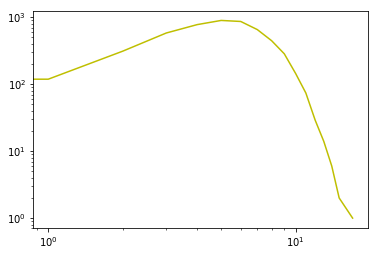

In [10]:
################################################################################
# CS 224W (Fall 2018) - HW1
# Starter code for Problem 1
# Author: praty@stanford.edu
# Last Updated: Sep 27, 2018
################################################################################

import snap
import numpy as np
import matplotlib.pyplot as plt
import random
# Setup
erdosRenyi = None
smallWorld = None
collabNet = None


# Problem 1.1
def genErdosRenyi(N=5242, E=14484):
    """
    :param - N: number of nodes
    :param - E: number of edges

    return type: snap.PUNGraph
    return: Erdos-Renyi graph with N nodes and E edges
    """
    ############################################################################
    # TODO: Your code here!
    if N <= 0:
        raise Exception('Cannot be lower than 0')
    Graph = snap.PUNGraph.New()
    for i in range(N):
        Graph.AddNode(i)
    count_sampled = 0
    sampled_set = set()
    while count_sampled < E:
        i = random.randint(0, N-1)
        j = random.randint(0, N-1)
        if (i,j) not in sampled_set and i != j:
            sampled_set.add((i,j))
            count_sampled = count_sampled + 1
    for (i,j) in sampled_set:
        Graph.AddEdge(i, j)
    ############################################################################
    return Graph


def genCircle(N=5242):
    """
    :param - N: number of nodes

    return type: snap.PUNGraph
    return: Circle graph with N nodes and N edges. Imagine the nodes form a
        circle and each node is connected to its two direct neighbors.
    """
    ############################################################################
    # TODO: Your code here!
    Graph = snap.PUNGraph.New()
    for i in range(N):
        Graph.AddNode(i)
    ############################################################################
    return Graph


def connectNbrOfNbr(Graph, N=5242):
    """
    :param - Graph: snap.PUNGraph object representing a circle graph on N nodes
    :param - N: number of nodes

    return type: snap.PUNGraph
    return: Graph object with additional N edges added by connecting each node
        to the neighbors of its neighbors
    """
    ############################################################################
    # TODO: Your code here!
    for i in range(N-1):
        Graph.AddEdge(i, i+1)
    Graph.AddEdge(N-1, 0)
    ############################################################################
    return Graph


def connectRandomNodes(Graph, M=4000):
    """
    :param - Graph: snap.PUNGraph object representing an undirected graph
    :param - M: number of edges to be added

    return type: snap.PUNGraph
    return: Graph object with additional M edges added by connecting M randomly
        selected pairs of nodes not already connected.
    """
    ############################################################################
    # TODO: Your code here!
    memory = set()
    while len(memory) < M:
        x = random.randint(0, M)
        y = random.randint(0, M)
        if x != y and (x,y) not in memory and (y,x) not in memory:
            memory.add((x,y))
    for edge_src, edge_dst in memory:
        Graph.AddEdge(edge_src, edge_dst)
    ############################################################################
    return Graph


def genSmallWorld(N=5242, E=14484):
    """
    :param - N: number of nodes
    :param - E: number of edges

    return type: snap.PUNGraph
    return: Small-World graph with N nodes and E edges
    """
    Graph = genCircle(N)
    Graph = connectNbrOfNbr(Graph, N)
    Graph = connectRandomNodes(Graph, 4000)
    return Graph


def loadCollabNet(path):
    """
    :param - path: path to edge list file

    return type: snap.PUNGraph
    return: Graph loaded from edge list at `path and self edges removed

    Do not forget to remove the self edges!
    """
    ############################################################################
    # TODO: Your code here!
    Graph = snap.PUNGraph.New()
    edges = []
    node_set = set()
    with open(path) as f:
        lines = f.readlines()
        for line in lines:
            if '#' in line:
                continue
            two_parts = line.split()
            src_id = int(two_parts[0])
            dst_id = int(two_parts[1])
            node_set.add(src_id)
            node_set.add(dst_id)
            if src_id != dst_id:
                edges.append((src_id, dst_id))
    for node_id in node_set:
        Graph.AddNode(node_id)
    for edge_src, edge_dst in edges:
        Graph.AddEdge(edge_src, edge_dst)
    ############################################################################
    return Graph


def getDataPointsToPlot(Graph):
    """
    :param - Graph: snap.PUNGraph object representing an undirected graph

    return values:
    X: list of degrees
    Y: list of frequencies: Y[i] = fraction of nodes with degree X[i]
    """
    ############################################################################
    # TODO: Your code here!
    X, Y = [], []
    degree_map = {}
    for node in Graph.Nodes():
        if node.GetOutDeg() in degree_map:
            degree_map[node.GetOutDeg()] = degree_map[node.GetOutDeg()] +1
        else:
            degree_map[node.GetOutDeg()] = 1
    for x, y in degree_map.items():
        X.append(x)
        Y.append(y)
    ############################################################################
    return X, Y


def Q1_1():
    """
    Code for HW1 Q1.1
    """
    global erdosRenyi, smallWorld, collabNet
    erdosRenyi = genErdosRenyi(5242, 14484)
    smallWorld = genSmallWorld(5242, 14484)
    collabNet = loadCollabNet("ca-GrQc.txt")

    x_erdosRenyi, y_erdosRenyi = getDataPointsToPlot(erdosRenyi)
    plt.loglog(x_erdosRenyi, y_erdosRenyi, color = 'y', label = 'Erdos Renyi Network')

    # x_smallWorld, y_smallWorld = getDataPointsToPlot(smallWorld)
    # plt.loglog(x_smallWorld, y_smallWorld, linestyle = 'dashed', color = 'r', label = 'Small World Network')

    # x_collabNet, y_collabNet = getDataPointsToPlot(collabNet)
    # plt.loglog(x_collabNet, y_collabNet, linestyle = 'dotted', color = 'b', label = 'Collaboration Network')

    # plt.xlabel('Node Degree (log)')
    # plt.ylabel('Proportion of Nodes with a Given Degree (log)')
    # plt.title('Degree Distribution of Erdos Renyi, Small World, and Collaboration Networks')
    # plt.legend()
    # plt.show()


# Execute code for Q1.1
Q1_1()


# Problem 1.2 - Clustering Coefficient

def calcClusteringCoefficientSingleNode(Node, Graph):
    """
    :param - Node: node from snap.PUNGraph object. Graph.Nodes() will give an
                   iterable of nodes in a graph
    :param - Graph: snap.PUNGraph object representing an undirected graph

    return type: float
    returns: local clustering coeffient of Node
    """
    ############################################################################
    # TODO: Your code here!
    if Node.GetOutDeg() < 2:
        return 0
    C = 0.0
    neighbors = {}
    count = 0
    edge_count = 0
    for index_id in xrange(Node.GetOutDeg()):
        if Node.GetOutNId(index_id) != Node.GetId():
            neighbors[count] = Node.GetOutNId(index_id)
            count = count + 1
    for inner_index, curr_node_id in neighbors.items():
        curr_node = Graph.GetNI(curr_node_id)
        for neighbor_index in xrange(inner_index+1, count):
            neighbor_node_id = neighbors[neighbor_index]
            if curr_node.IsNbrNId(neighbor_node_id):
                edge_count = edge_count + 1
    degree = Node.GetOutDeg()
    C = 2.0*edge_count/ (degree*(degree-1))
    ############################################################################
    return C

def calcClusteringCoefficient(Graph):
    """
    :param - Graph: snap.PUNGraph object representing an undirected graph

    return type: float
    returns: clustering coeffient of Graph
    """
    ############################################################################
    # TODO: Your code here! If you filled out calcClusteringCoefficientSingleNode,
    #       you'll probably want to call it in a loop here
    C = 0.0
    count = 0
    for node in Graph.Nodes():
        C += calcClusteringCoefficientSingleNode(node, Graph)
        count = count + 1
    C = C/count
    ############################################################################
    return C

def Q1_2():
    """
    Code for Q1.2
    """
    C_erdosRenyi = calcClusteringCoefficient(erdosRenyi)
    C_smallWorld = calcClusteringCoefficient(smallWorld)
    C_collabNet = calcClusteringCoefficient(collabNet)

    print('Clustering Coefficient for Erdos Renyi Network: %f' % C_erdosRenyi)
    print('Clustering Coefficient for Small World Network: %f' % C_smallWorld)
    print('Clustering Coefficient for Collaboration Network: %f' % C_collabNet)


# Execute code for Q1.2
Q1_2()


In [11]:
erdosRenyi = genErdosRenyi(5242, 14484)
smallWorld = genSmallWorld(5242, 14484)
collabNet = loadCollabNet("ca-GrQc.txt")

In [15]:
Graph = collabNet
GraphClustCoeff = snap.GetClustCf (Graph, -1)
print "Clustering coefficient: %f" % GraphClustCoeff
# DegToCCfV = snap.TFltPrV()
# result = snap.GetClustCfAll(Graph, DegToCCfV)
# for item in DegToCCfV:
#     print "degree: %d, clustering coefficient: %f" % (item.GetVal1(), item.GetVal2())
    

Clustering coefficient: 0.529636
